# Data Vizualization: Explorando com Seaborn

__Professor:__ Guilherme Lima<br>
__Disponível em:__ <a href="" target=blank>ALURA</a>

## 01. Importando e traduzindo os dados

### Importando os dados

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('tips.csv')
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


### Traduzindo colunas e campos

In [3]:
# Verificando as colunas
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [4]:
#criando um dicionário para renomear as colunas
renomear = {
    'total_bill':'valor_da_conta',
    'tip':'gorjeta',
    'dessert':'sobremesa',
    'day':'dia_da_semana',
    'time':'hora_do_dia',
    'size':'total_de_pessoas'
}
type(renomear)

dict

In [5]:
gorjetas = dados.rename(columns=renomear)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [6]:
#verificando os valores de uma coluna
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [7]:
sim_nao = {
    'No':'Não',
    'Yes':'Sim'
}

In [8]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [9]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [10]:
dias = {
    'Sun':'Domingo',
    'Sat':'Sabado',
    'Thur':'Quinta',
    'Fri':'Sexta'
}

In [11]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [12]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [13]:
hora = {
    'Dinner':'Jantar',
    'Lunch':'Almoço'
}

In [14]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


### Exercício: Lendo um CSV
Uma pessoa que trabalha como cientista de dados, recebeu um arquivo chamado financeiro.csv com informações que deveriam ser analisadas.

O que essa pessoa deve fazer para ler este arquivo e armazenar numa variável chamada dados?

Selecione uma alternativa

a) dados = pandas.read_csv('financeiro.csv')<br>
__b) import pandas as pd__
___dados = pd.read_csv('financeiro.csv')<br>___
c) import pandas as pd
dados = read_csv('financeiro.csv')<br>

### Exercício: Reforçando o aprendizado
Uma pessoa criou um notebook em inglês para analisar a quantidade de pessoas em diferentes capitais do mundo.

Porém, antes de começar suas respectivas análises, decidiu traduzir as colunas e os campos para o português, conforme ilustram as imagens abaixo:

Imagens ilustrando o DataFrame com colunas e campos em inglês e em português

Sabendo disso, marque as alternativas verdadeiras:

Selecione 2 alternativas

__a) Para traduzir os campos, a pessoa poderia usar o seguinte código:<br>
paises = {'Belgium':'Bélgica', 'India':'Índia', 'Japan':'Japão'}<br>
dados.Country = dados.Country.map(paises)<br>
dados<br><br>
b) Para traduzir as colunas, a pessoa poderia usar o seguinte código:<br>
colunas = {'Country':'País', 'Population':'População'}<br>
dados = dados.rename(columns=colunas)<br>
dados<br><br>__
c) Para traduzir os campos, a pessoa poderia usar o seguinte código:<br>
paises = {'Belgium':'Bélgica', 'India':'Índia', 'Japan':'Japão'}<br>
dados.Country = dados.Country.rename(paises)<br>
dados<br><br>
d) Para traduzir as colunas, a pessoa poderia usar o seguinte código:<br>
colunas = {'Country':'País', 'Population':'População'}<br>
dados.rename(columns=colunas)<br>
dados

## 02. Comparando distribuições de maneira exploratória
Análise I: Valor da conta e gorjeta

### Seaborn e scatterplot

In [15]:
# Importando bibliotecas
!pip install seaborn==0.9.0
#!conda install seaborn=0.9.0 --user

In [16]:
import seaborn as sns

In [17]:
#Visualizar a versão do SEABORN
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /home/viniciusgb/anaconda3/lib/python3.9/site-packages
Requires: numpy, scipy, pandas, matplotlib
Required-by: 


In [18]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

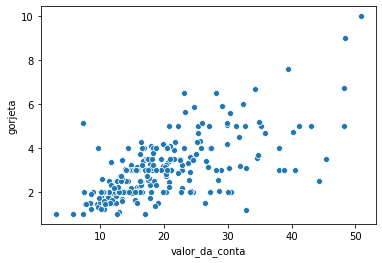

In [19]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta',y='gorjeta',data=gorjetas)

Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta

In [20]:
print(f'A base de dados contém {gorjetas.shape[0]} registros.\n Registros não nulos: \n{gorjetas.count()}')

A base de dados contém 244 registros.
 Registros não nulos: 
valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64


### Coluna porcentagem

In [21]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [22]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [23]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


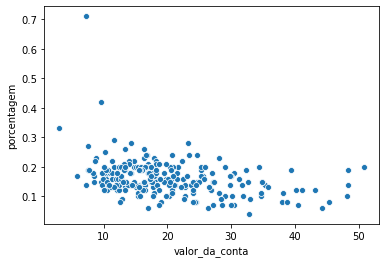

In [24]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta',y='porcentagem',data=gorjetas)

Visualmente, o valor da conta não é proporcional ao valor da gorjeta.

### Relplot e implot

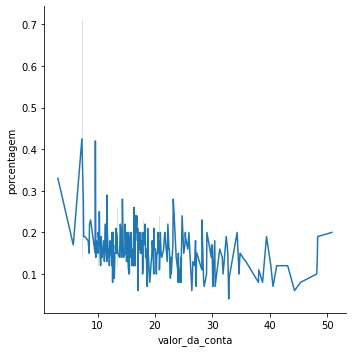

In [25]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta',y='porcentagem',data=gorjetas, kind='line')

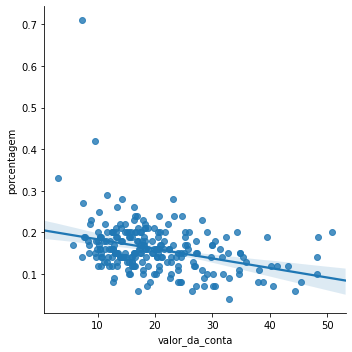

In [26]:
sns.lmplot(x='valor_da_conta',y='porcentagem',data=gorjetas)

### Exercício: Inserindo novos campos
Uma escola registrava as notas de seus alunos em um notebook para fazer análises gerando gráficos e relatórios.

Porém, após uma reunião, foi decidido incluir um novo campo no DataFrame para armazenar a média das 3 notas de cada aluno.

Imagem exibindo o DataFrame sem a média e uma seta exibindo o DataFrame com a média

Sabendo disso, qual das alternativas abaixo contém o código para criação do campo Média com o cálculo da média de cada aluno, utilizando apenas 2 casas decimais?

Selecione uma alternativa

In [27]:
#CORRETA: a) dados['Média'] = ((dados.Nota_1 + dados.Nota_2 + dados.Nota_3) / 3).round(2)

In [28]:
# b) dados.['Média'] = ((dados.Nota_1 + dados.Nota_2 + dados.Nota_3) / 3).round(2)

In [29]:
# c) dados['Média'] = ((dados.Nota_1 + dados.Nota_2 + dados.Nota_3) / 3)

### Exercício: Gráficos com Seaborn
Para analisar e explorar os dados referente a gorjeta do nosso curso, geramos alguns gráficos através do Seaborn conforme a imagem abaixo:
imagem com 3 gráficos
Sabendo disso, analise as alternativas abaixo e marque as verdadeiras.
Selecione 3 alternativas

a) Para gerar o gráfico 1, utilizamos o código:

sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas )

Certo! Para mais informações sobre scatterplot, clique neste link.

Alternativa correta

b) Para gerar os gráficos acima, é necessário passar no mínimo 3 parâmetros.


Certo! É necessário informar o campo que será o valor x, o campo que será o valor y e o nome do DataFrame que estamos utilzando através do parâmetro data=gorjetas, por exemplo.

Alternativa correta

c) Para gerar o gráfico 2, utilizamos o código:

sns.lmplot(x='valor_da_conta', y='porcentagem',kind:'line', data=gorjetas)

Alternativa correta

d) Para gerar o gráfico 3, utilizamos o código:

sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

Certo! Para mais informações sobre lmplot, clique neste link.

## 03. Analisando de forma visual e 
Análise II: Sobremesa

### Análise descritiva

In [30]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [31]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [32]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


### Análise visual

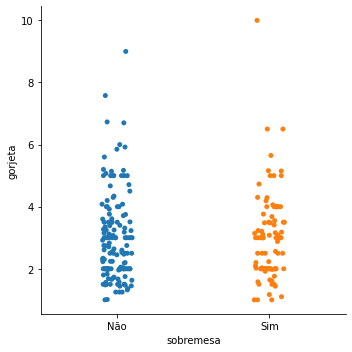

In [33]:
sns.catplot(x='sobremesa',y='gorjeta',data=gorjetas)

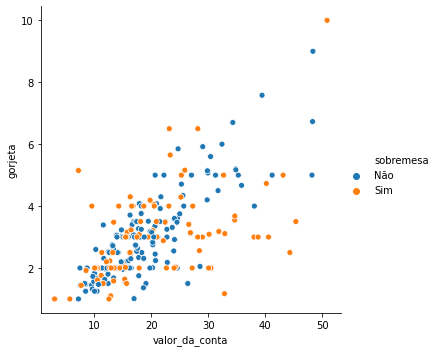

In [34]:
sns.relplot(x='valor_da_conta',y='gorjeta',hue='sobremesa',data=gorjetas)

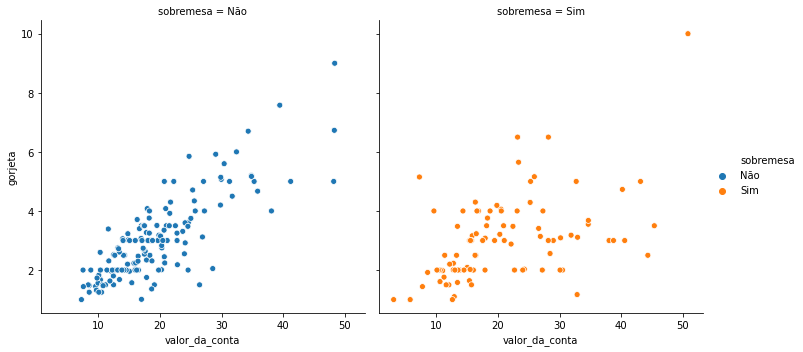

In [35]:
sns.relplot(x='valor_da_conta',y='gorjeta',hue='sobremesa',data=gorjetas,col='sobremesa')

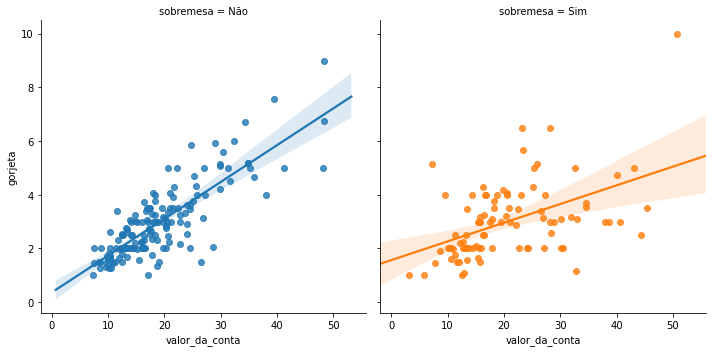

In [36]:
sns.lmplot(x='valor_da_conta',y='gorjeta',col='sobremesa',hue='sobremesa',data=gorjetas)

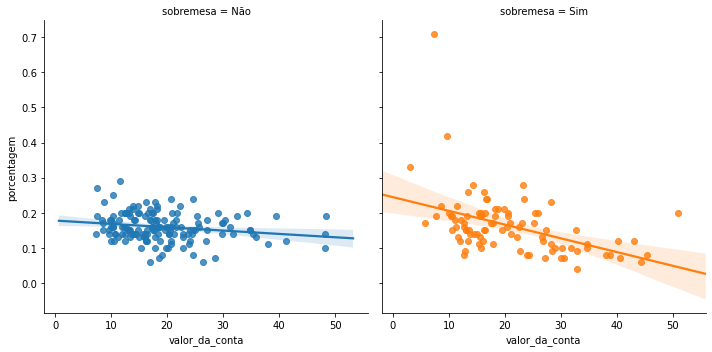

In [37]:
sns.lmplot(x='valor_da_conta',y='porcentagem',col='sobremesa',hue='sobremesa',data=gorjetas)

Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram sobremesa

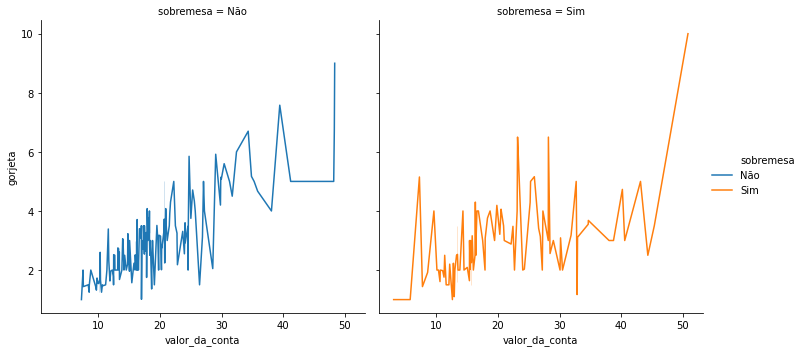

In [38]:
sns.relplot(x='valor_da_conta',y='gorjeta',col='sobremesa',hue='sobremesa',data=gorjetas,kind='line')

### Teste de hipótese

#### Hipótese nula: 
A distribuição da taxa de gorjeta é a mesma nos dois grupos. p-value < 5
#### Hipótese alternativa:
A distribuição da taxa de gorjeta não é a mesma nos dois grupos. p-value > 5

In [39]:
# Importando a bibliotecas necessárias
from scipy.stats import ranksums

In [40]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [41]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [42]:
r = ranksums(sobremesa,sem_sobremesa)
print(f'O valor do p-value é: {r.pvalue}')

O valor do p-value é: 0.5266635660124415


### Exercício: Alterando a tonalidade
____Dica: Começando daqui ? - Para visualizar ou fazer download do projeto da aula anterior, <a href="https://github.com/alura-cursos/analise-dados-seaborn/archive/aula2.zip" target=blank>clique neste link</a>___<br>
Uma pessoa para analisar o valor da gorjeta em relação ao valor da conta, gerou o seguinte gráfico:<br>
Imagem exibindo no eixo x valor da conta e no eixo y valor da gorjeta em pontos<br>
Porém, decidiu incluir um critério a mais em sua análise: identificar quem pediu sobremesa ou não com uma tonalidade diferente.
Isso é possível? Se sim, o que deve ser alterado no código?<br>
Selecione uma alternativa<br>

a) Isso não é possível. Ao utilizar o código sns.relplot(), não existe nenhum parâmetro que altere a tonalidade do gráfico.<br>
b) Isso é possível. Ao utilizar o código sns.relplot(), existe um parâmetro que altere a tonalidade do gráfico chamado col.<br>
__c) Isso é possível. Ao utilizar o código sns.relplot(), existe um parâmetro que altere a tonalidade do gráfico chamado hue.<br>__

### Exercício: Sobre teste de hipótese
No nosso projeto, realizamos o teste de hipótese em relação a porcentagem da gorjeta dada pelas pessoas que pediram e não pediram sobremesa e encontramos o seguinte valor:
<br>
p-value = 0.5266635660124415
<br>
O que esse valor do p-value representa?
<br>
Selecione uma alternativa


a) Representa que temos evidências suficiente para aceitar a hipótese alternativa e a hipótese nula ao mesmo tempo.<br>
b) Representa que temos evidências suficiente para aceitar a hipótese alternativa.<br>
__c) Representa que não temos evidências suficiente para aceitar a hipótese alternativa.__

## 04. Comparando e explorando os dias da semana
Análise III: Dias da semana

### Dias da semana

In [43]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [44]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sabado', 'Quinta', 'Sexta'], dtype=object)

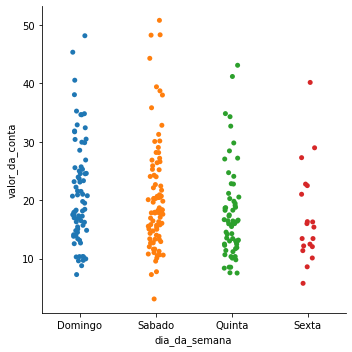

In [45]:
sns.catplot(x='dia_da_semana',y='valor_da_conta',data=gorjetas)

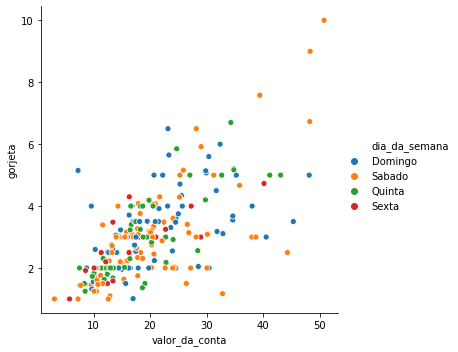

In [46]:
sns.relplot(x='valor_da_conta',y='gorjeta',hue='dia_da_semana',data=gorjetas)

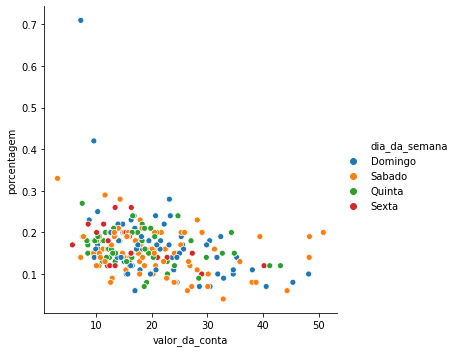

In [47]:
sns.relplot(x='valor_da_conta',y='porcentagem',hue='dia_da_semana',data=gorjetas)

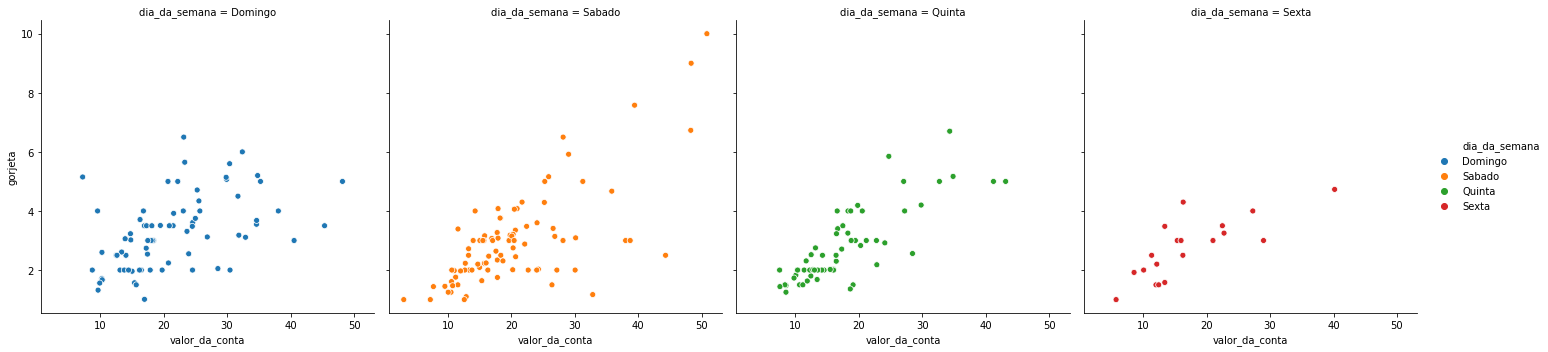

In [48]:
sns.relplot(x='valor_da_conta',y='gorjeta',hue='dia_da_semana',col='dia_da_semana',data=gorjetas)

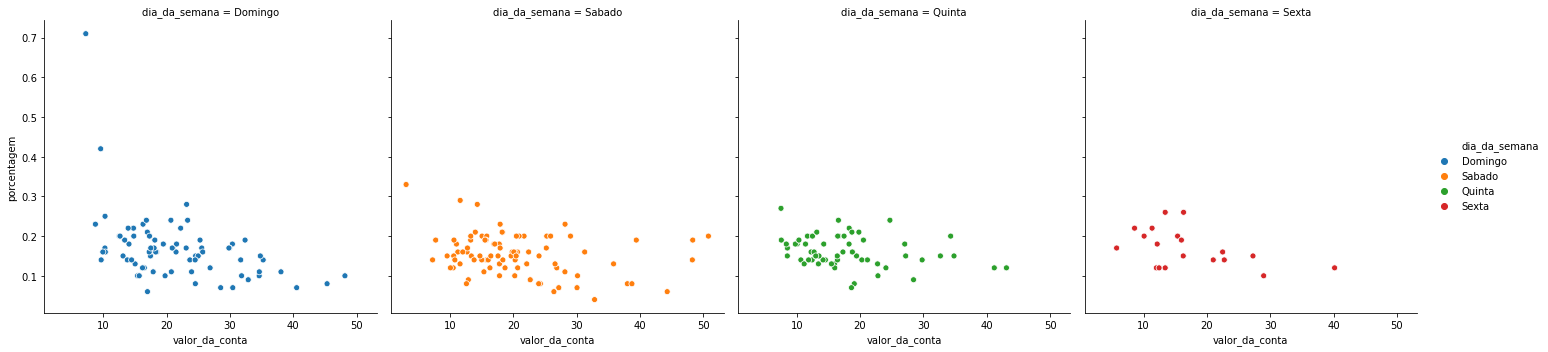

In [49]:
sns.relplot(x='valor_da_conta',y='porcentagem',hue='dia_da_semana',col='dia_da_semana',data=gorjetas)

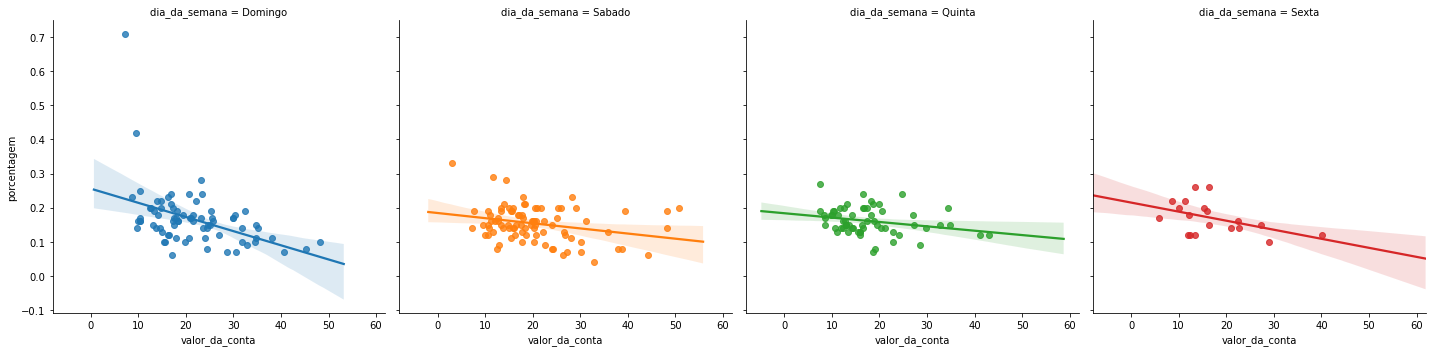

In [50]:
sns.lmplot(x='valor_da_conta',y='porcentagem',hue='dia_da_semana',col='dia_da_semana',data=gorjetas)

### Análise descritiva

In [51]:
media_geral_gorjetas = gorjetas.gorjeta.mean()
media_geral_gorjetas

2.9982786885245902

In [52]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sabado,20.441379,2.993103,0.153678
Sexta,17.151579,2.734737,0.169474


In [53]:
print('Frequência dos dias:')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias:


Sabado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

### Teste de hipótese
__Hipótese nula:__ A distribuição do valor da conta é igual no sábado e no domingo. ___p-value < 5___<br>
__Hipótese alternativa:__  A distribuição do valor da conta não é igual no sábado e no domingo. ___p-value >= 5___

In [54]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta
valor_conta_domingo

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
186    20.90
187    30.46
188    18.15
189    23.10
190    15.69
Name: valor_da_conta, Length: 76, dtype: float64

In [55]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sabado'").valor_da_conta
valor_conta_sabado

19     20.65
20     17.92
21     20.29
22     15.77
23     39.42
       ...  
238    35.83
239    29.03
240    27.18
241    22.67
242    17.82
Name: valor_da_conta, Length: 87, dtype: float64

In [56]:
r2 = ranksums(valor_conta_domingo,valor_conta_sabado)
print(f'O valor do p-value é: {r2.pvalue}')

O valor do p-value é: 0.3576728477868443


### Exercício: Pessoas no almoço e jantar
__Dica: Começando daqui ? - Para visualizar ou fazer download do projeto da aula anterior, <a href="https://github.com/alura-cursos/analise-dados-seaborn/archive/aula3.zip" target=blank>clique neste link.</a><br>__
Uma pessoa decidiu analisar a média do valor da conta e do valor da gorjeta de cada dia. Para isso, rodou o seguinte código em seu notebook:
<br>
gorjetas.groupby(['dia_da_semana']).mean()
<br>
Porém, resultado não foi o esperado, já que exibiu a média de pessoas em cada dia:
<br>
Então decidiu alterar para exibir o a mesma tabela sem a média do total de pessoas, conforme ilustra a imagem abaixo:
<br>
Sabendo disso, podemos afirmar que:
<br>
Selecione 2 alternativas

a) Para exibir a média do valor da conta, gorjeta e porcentagem de cada dia sem exibir a média de pessoas, podemos executar o seguinte código: gorjetas.groupby(['dia_da_semana']).median()[['valor_da_conta', 'gorjeta', 'porcentagem']]
<br>
__b) Para exibir a média do valor da conta, gorjeta e porcentagem de cada dia sem exibir a média de pessoas, podemos executar o seguinte código: gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]
<br>__
c) Não é possível remover a coluna pessoa utilizando o groupby().
<br>
__d) Como não existem 2,84 pessoas, não faz sentido exibir a média deste tipo de dado. Faz mais sentido exibir o valor da mediana ou moda.__

### Exercício: Sábado e Quinta
Ao plotar a imagem do valor da conta e a porcentagem da gorjeta de cada dia, algo chamou a atenção de uma pessoa que estava analisando:
<br>
A pessoa percebeu, que visualmente existe uma diferença entre esses dois dias. Então, ao estabelecer duas hipóteses, realizou o seguinte teste:
<br>
Sabendo que o valor do p-value = 0.046688533353323416, com o nível de significância de 5%, podemos afirmar que.
<br>
Selecione uma alternativa


a) Podemos aceitar as duas hipóteses.<br>
__b) Rejeita a hipótese nula, adotando que a distribuição do valor da conta não é igual na quinta e no sábado para fins práticos<br>__
c) Não rejeita a hipótese nula, adotando que a distribuição do valor da conta é igual na quinta e no sábado para fins práticos

## 05. Distribuição de frequência e teste de hipótese
Análise IV: Hora do dia

### Distplot, boxplot e violinplot

In [57]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [58]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

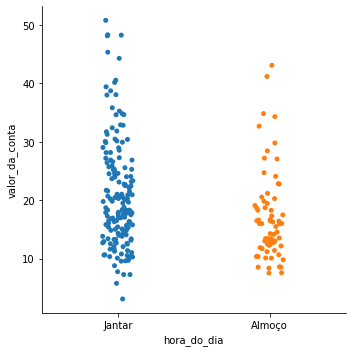

In [59]:
sns.catplot(x='hora_do_dia',y='valor_da_conta',data=gorjetas)

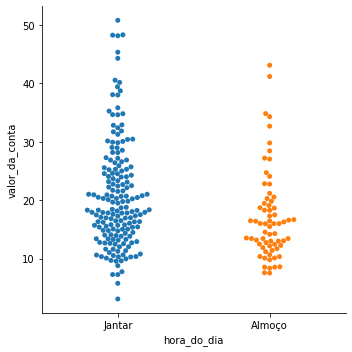

In [60]:
sns.catplot(x='hora_do_dia',y='valor_da_conta',kind='swarm',data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

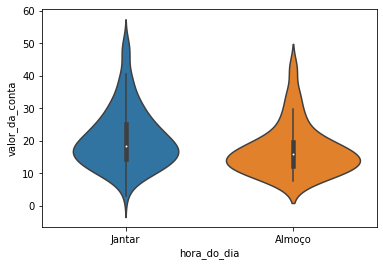

In [62]:
sns.violinplot(x='hora_do_dia',y='valor_da_conta',data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

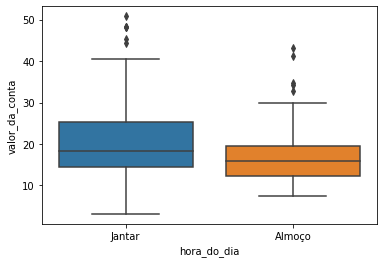

In [63]:
sns.boxplot(x='hora_do_dia',y='valor_da_conta',data=gorjetas)

In [65]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta
almoco

77     27.20
78     22.76
79     17.29
80     19.44
81     16.66
       ...  
222     8.58
223    15.98
224    13.42
225    16.27
226    10.09
Name: valor_da_conta, Length: 68, dtype: float64

<AxesSubplot:xlabel='valor_da_conta'>

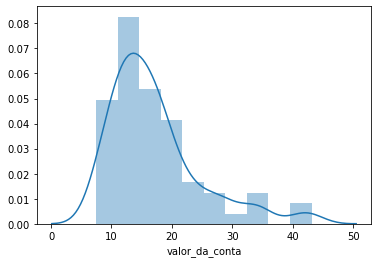

In [67]:
sns.distplot(almoco)

<AxesSubplot:xlabel='valor_da_conta'>

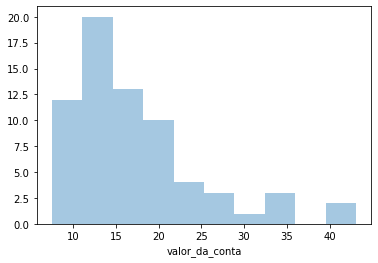

In [68]:
sns.distplot(almoco, kde = False)

In [69]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta
jantar

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: valor_da_conta, Length: 176, dtype: float64

<AxesSubplot:xlabel='valor_da_conta'>

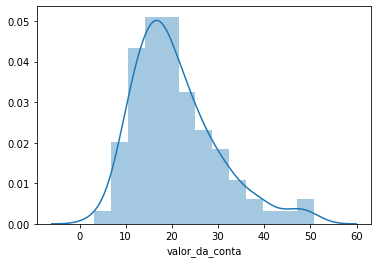

In [70]:
sns.distplot(jantar)

<AxesSubplot:xlabel='valor_da_conta'>

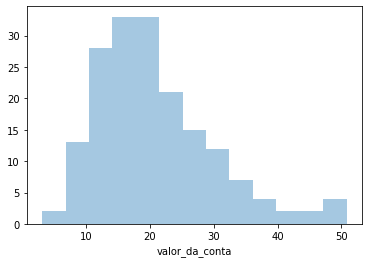

In [75]:
sns.distplot(jantar,kde=False)

### Teste de hipótese 2
__Hipótese nula:__ A distribuição do valor da conta é igual no jantar e almoço. _p-value > 5_<br>
__Hipótese alternativa:__ A distribuição do valor da conta não é igual no jantar e almoço. _p-value < 5_

In [82]:
gorjetas.groupby(by=['hora_do_dia']).mean()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


__Hipótese nula:__ A distribuição na taxa da gorjeta é igual no jantar e almoço. _p-value > 5_<br>
__Hipótese alternativa:__ A distribuição na taxa da gorjeta não é igual no jantar e almoço. _p-value < 5_

In [83]:
r3 = ranksums(jantar,almoco)
print(f'O valor do p-value é: {r3}')

O valor do p-value é: RanksumsResult(statistic=3.2438872807262955, pvalue=0.0011791039723641672)


In [84]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem
porcentagem_almoco

77     0.15
78     0.13
79     0.16
80     0.15
81     0.20
       ... 
222    0.22
223    0.19
224    0.12
225    0.15
226    0.20
Name: porcentagem, Length: 68, dtype: float64

In [85]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem
porcentagem_jantar

0      0.06
1      0.16
2      0.17
3      0.14
4      0.15
       ... 
239    0.20
240    0.07
241    0.09
242    0.10
243    0.16
Name: porcentagem, Length: 176, dtype: float64

In [86]:
ranksums(porcentagem_almoco,porcentagem_jantar)

RanksumsResult(statistic=1.1258018532735787, pvalue=0.2602493995587126)

### Exercício: Única escolha sobre o conteúdo da aula
__Dica: Começando daqui ? - Para visualizar ou fazer download do projeto da aula anterior, <a href="https://github.com/alura-cursos/analise-dados-seaborn/archive/aula4.zip" target=blank>clique neste link</a>__
<br>
Durante esta aula, vimos que é possível gerar histogramas, por exemplo:
<br>
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta
sns.distplot(almoco)COPIAR CÓDIGO
E nosso resultado seria:
<br>
Sabendo disso, podemos definir um histograma como:
<br>
Selecione uma alternativa